# más que arbolitos

In [3]:
!pip install xgboost
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 62.7 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.9 MB/s eta 0:00:00
  Using cached numpy-1.24.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 KB 17.1 MB/s eta 0:00:00
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 54.6 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [13]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 72.2 MB/s eta 0:00:00
  Using cached scikit_learn-1.2.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
  Using cached numpy-1.24.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 99.8 MB/s eta 0:00:00
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 KB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 KB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 KB 62.7 M

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, roc_auc_score, top_k_accuracy_score, accuracy_score, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import random as rd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier 
import multiprocessing
import time
from datetime import timedelta
from sklearn import tree
from sklearn.datasets import make_classification
import plotly.graph_objects as go
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [5]:
X_train = pd.read_parquet('X_train.parquet')
y_train = pd.read_parquet('y_train.parquet')

X_validation = pd.read_parquet('X_validation.parquet')
y_validation = pd.read_parquet('y_validation.parquet')

X_test = pd.read_parquet('X_test.parquet')
y_test = pd.read_parquet('y_test.parquet')

## bagging

### random forest

In [7]:
metrics = {}
for n_estimators in [3, 5, 10, 15, 30, 50, 100, 250]:
    for max_depth in [4, 8, 12, 16, 20]:
        start_time = time.time()
        model = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, max_features = 'sqrt')
        model.fit(X_train, y_train);
        
        train_pred = model.predict_proba(X_train)[:, 1]
        test_pred = model.predict_proba(X_validation)[:, 1]

        metrics['RF_'+ str(n_estimators)+'_'+str(max_depth)] = {
            'Train_Gini': 2*roc_auc_score(y_train, train_pred)-1,
            'Test_Gini': 2*roc_auc_score(y_validation, test_pred)-1,
            'Run_Time': time.time() - start_time
            }

metrics_RF = pd.DataFrame.from_dict(metrics, orient='index',columns=['Run_Time', 'Train_Gini', 'Test_Gini'])
metrics_RF['delta'] = (metrics_RF.Test_Gini - metrics_RF.Train_Gini) / metrics_RF.Train_Gini
metrics_RF

/tmp/ipykernel_88/3256116642.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train);
/tmp/ipykernel_88/3256116642.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train);
/tmp/ipykernel_88/3256116642.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train);
/tmp/ipykernel_88/3256116642.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train);
/tmp/ipykernel_88/3256116642.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

,Run_Time,Train_Gini,Test_Gini,delta
RF_3_4,0.061135,0.660188,0.609807,-0.076313
RF_3_8,0.067502,0.756859,0.713227,-0.057649
RF_3_12,0.073014,0.857953,0.797249,-0.070754
RF_3_16,0.094496,0.931354,0.841745,-0.096213
RF_3_20,0.098831,0.963831,0.816811,-0.152537
RF_5_4,0.082023,0.629196,0.585432,-0.069556
RF_5_8,0.088398,0.807223,0.768955,-0.047407
RF_5_12,0.107298,0.879628,0.816809,-0.071416
RF_5_16,0.126822,0.945594,0.857910,-0.092729
RF_5_20,0.146993,0.977082,0.858598,-0.121264


los de max depth 12 son muy buenos, como los cart anteriores incluso un poco mejores

el de numero arboles 30 y profundidad maxima 12 lo estudiamos luego con shap

### extra trees

In [6]:
metrics = {}
for n_estimators in [3, 5, 10, 15, 30, 50, 100, 250]:
    for max_depth in [4, 8, 12, 16, 20]:
        start_time = time.time()
        model = ExtraTreesClassifier(n_estimators = n_estimators, max_depth = max_depth, max_features = 'sqrt')
        model.fit(X_train,y_train);
        
        train_pred = model.predict_proba(X_train)[:, 1]
        test_pred = model.predict_proba(X_validation)[:, 1]

        metrics['ET_'+ str(n_estimators)+'_'+str(max_depth)] = {
            'Train_Gini': 2*roc_auc_score(y_train, train_pred)-1,
            'Test_Gini': 2*roc_auc_score(y_validation, test_pred)-1,
            'Run_Time': time.time() - start_time
            }

metrics_ET = pd.DataFrame.from_dict(metrics, orient='index',columns=['Run_Time', 'Train_Gini', 'Test_Gini'])
metrics_ET['delta'] = (metrics_ET.Test_Gini - metrics_ET.Train_Gini) / metrics_ET.Train_Gini
metrics_ET

/tmp/ipykernel_88/3026725649.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train);
/tmp/ipykernel_88/3026725649.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train);
/tmp/ipykernel_88/3026725649.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train);
/tmp/ipykernel_88/3026725649.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train);
/tmp/ipykernel_88/3026725649.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

,Run_Time,Train_Gini,Test_Gini,delta
ET_3_4,0.051271,0.555233,0.561925,0.012053
ET_3_8,0.050406,0.693201,0.673318,-0.028684
ET_3_12,0.073818,0.749193,0.689920,-0.079116
ET_3_16,0.079283,0.874295,0.787298,-0.099506
ET_3_20,0.091740,0.935434,0.804201,-0.140291
ET_5_4,0.064839,0.676983,0.655602,-0.031582
ET_5_8,0.073164,0.688277,0.666041,-0.032306
ET_5_12,0.088329,0.800227,0.752188,-0.060032
ET_5_16,0.107989,0.884039,0.798913,-0.096292
ET_5_20,0.125670,0.942926,0.825634,-0.124392


obviamente el overfitting está controlado pero en cuanto a precisión no es mejor que lo anterior

## boosting

### adaboost

In [7]:
metrics = {}
for n_estimators in [3, 5, 10, 15, 30, 50, 100, 250]:
    for eta in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]:
        start_time = time.time()
        model = AdaBoostClassifier(n_estimators = n_estimators, learning_rate = eta)
        model.fit(X_train, y_train);
        
        train_pred = model.predict_proba(X_train)[:, 1]
        test_pred = model.predict_proba(X_validation)[:, 1]

        metrics['AdaB_'+ str(n_estimators)+'_'+str(eta)] = {
            'Train_Gini': 2*roc_auc_score(y_train, train_pred)-1,
            'Test_Gini': 2*roc_auc_score(y_validation, test_pred)-1,
            'Run_Time': time.time() - start_time
            }

metrics_AdaB = pd.DataFrame.from_dict(metrics, orient='index',columns=['Run_Time', 'Train_Gini', 'Test_Gini'])
metrics_AdaB['delta'] = (metrics_AdaB.Test_Gini - metrics_AdaB.Train_Gini) / metrics_AdaB.Train_Gini
metrics_AdaB

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

,Run_Time,Train_Gini,Test_Gini,delta
AdaB_3_0.001,0.090037,0.357482,0.334256,-0.064971
AdaB_3_0.005,0.075628,0.357482,0.334256,-0.064971
AdaB_3_0.01,0.072308,0.357482,0.334256,-0.064971
AdaB_3_0.05,0.078245,0.357482,0.334256,-0.064971
AdaB_3_0.1,0.075918,0.357482,0.334256,-0.064971
AdaB_3_0.5,0.073300,0.561381,0.524921,-0.064948
AdaB_3_1,0.079175,0.598295,0.573274,-0.041821
AdaB_5_0.001,0.108146,0.357482,0.334256,-0.064971
AdaB_5_0.005,0.104645,0.357482,0.334256,-0.064971
AdaB_5_0.01,0.106986,0.357482,0.334256,-0.064971


malillos

### xgb

In [10]:
metrics = {}
for n_estimators in [3, 5, 10, 15, 30, 50, 100, 250]:
    for max_depth in [4, 8, 12, 16, 20]:
        for eta in [0.01, 0.05, 0.1]:
            start_time = time.time()
            model = XGBClassifier(max_depth=max_depth, eta=eta, n_estimators=n_estimators)
            model.fit(X_train, y_train);
            
            train_pred = model.predict_proba(X_train)[:, 1]
            test_pred = model.predict_proba(X_validation)[:, 1]

            metrics['XGB_'+ str(n_estimators)+'_'+str(max_depth)] = {
                'Learning_Rate': eta,
                'Train_Gini': 2*roc_auc_score(y_train, train_pred)-1,
                'Test_Gini': 2*roc_auc_score(y_validation, test_pred)-1,
                'Run_Time': time.time() - start_time
                }

metrics_XGB = pd.DataFrame.from_dict(metrics, orient='index',columns=['Learning_Rate', 'Run_Time', 'Train_Gini', 'Test_Gini'])
metrics_XGB['delta'] = (metrics_XGB.Test_Gini - metrics_XGB.Train_Gini) / metrics_XGB.Train_Gini
metrics_XGB

,Learning_Rate,Lambda,Gamma,Run_Time,Train_Gini,Test_Gini,delta
XGB_3_4,0.1,1,1,0.120917,0.753207,0.725965,-0.036168
XGB_3_8,0.1,1,1,0.195095,0.861302,0.821996,-0.045637
XGB_3_12,0.1,1,1,0.286211,0.913733,0.855676,-0.063538
XGB_3_16,0.1,1,1,0.357794,0.938817,0.862683,-0.081096
XGB_3_20,0.1,1,1,0.427415,0.948418,0.862609,-0.090476
XGB_5_4,0.1,1,1,0.152456,0.757413,0.729685,-0.036609
XGB_5_8,0.1,1,1,0.275965,0.869921,0.832022,-0.043567
XGB_5_12,0.1,1,1,0.525719,0.920579,0.859187,-0.066689
XGB_5_16,0.1,1,1,0.562686,0.945878,0.865688,-0.084778
XGB_5_20,0.1,1,1,0.649739,0.955829,0.866480,-0.093478


quito lambda y gamma porque tarda mucho, se quedan por defecto

aqui ya hay modelos bien finos

### lightgbm

In [11]:
metrics = {}
for n_estimators in [3, 5, 10, 15, 30, 50, 100, 250]:
    for max_depth in [4, 8, 12, 16, 20]:
        for eta in [0.01, 0.05, 0.1]:
            start_time = time.time()
            model = LGBMClassifier(max_depth=max_depth, n_estimators=n_estimators, eta=eta )
            model.fit(X_train,y_train);
            
            train_pred = model.predict_proba(X_train)[:, 1]
            test_pred = model.predict_proba(X_validation)[:, 1]

            metrics['LGBM_'+ str(n_estimators)+'_'+str(max_depth)] = {
                'Learning_Rate': eta,
                'Train_Gini': 2*roc_auc_score(y_train, train_pred)-1,
                'Test_Gini': 2*roc_auc_score(y_validation, test_pred)-1,
                'Run_Time': time.time() - start_time
                }

metrics_LGBM = pd.DataFrame.from_dict(metrics, orient='index',columns=['Learning_Rate', 'Run_Time', 'Train_Gini', 'Test_Gini'])
metrics_LGBM['delta'] = (metrics_LGBM.Test_Gini - metrics_LGBM.Train_Gini) / metrics_LGBM.Train_Gini
metrics_LGBM

/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.01 will be ignored. Current value: learning_rate=0.1
/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:134

,Learning_Rate,Run_Time,Train_Gini,Test_Gini,delta
LGBM_3_4,0.1,0.496893,0.753726,0.726749,-0.035791
LGBM_3_8,0.1,0.379390,0.807861,0.778629,-0.036184
LGBM_3_12,0.1,0.404497,0.808028,0.779264,-0.035597
LGBM_3_16,0.1,0.490969,0.808028,0.779264,-0.035597
LGBM_3_20,0.1,0.415095,0.808028,0.779264,-0.035597
LGBM_5_4,0.1,0.679349,0.759821,0.734338,-0.033538
LGBM_5_8,0.1,0.487319,0.811814,0.782191,-0.036490
LGBM_5_12,0.1,0.517357,0.815731,0.787170,-0.035013
LGBM_5_16,0.1,0.804949,0.815731,0.787170,-0.035013
LGBM_5_20,0.1,0.497945,0.815731,0.787170,-0.035013


aqui tb hay modelos buenardos

## shap random forest 30,12

montamos el modelito

In [10]:
metrics = {}

start_time = time.time()
rf = RandomForestClassifier(n_estimators = 30, max_depth = 12, max_features = 'sqrt')
rf.fit(X_train, y_train);

train_pred = rf.predict_proba(X_train)[:, 1]
test_pred = rf.predict_proba(X_validation)[:, 1]

metrics['RF_30_12'] = {
    'Train_Gini': 2*roc_auc_score(y_train, train_pred)-1,
    'Test_Gini': 2*roc_auc_score(y_validation, test_pred)-1,
    'Run_Time': time.time() - start_time
    }

metrics_RF = pd.DataFrame.from_dict(metrics, orient='index',columns=['Run_Time', 'Train_Gini', 'Test_Gini'])
metrics_RF['delta'] = (metrics_RF.Test_Gini - metrics_RF.Train_Gini) / metrics_RF.Train_Gini
metrics_RF

/tmp/ipykernel_88/690244135.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train);


,Run_Time,Train_Gini,Test_Gini,delta
RF_30_12,0.557607,0.911353,0.853588,-0.063384


metricas con los datos de test

In [12]:
testreal_pred = rf.predict_proba(X_test)[:, 1]
metrics2 = {}
metrics2['RF_30_12'] = {
    'Train_Gini': 2*roc_auc_score(y_train, train_pred)-1,
    'TestReal_Gini': 2*roc_auc_score(y_test, testreal_pred)-1,
    }

metrics2_RF = pd.DataFrame.from_dict(metrics2, orient='index',columns=['Train_Gini', 'TestReal_Gini'])
metrics2_RF['delta'] = (metrics2_RF.TestReal_Gini - metrics2_RF.Train_Gini) / metrics2_RF.Train_Gini
metrics2_RF

,Train_Gini,TestReal_Gini,delta
RF_30_12,0.911353,0.855877,-0.060873


efectivamente va como esperábamos

/opt/conda/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/opt/conda/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, num_pa

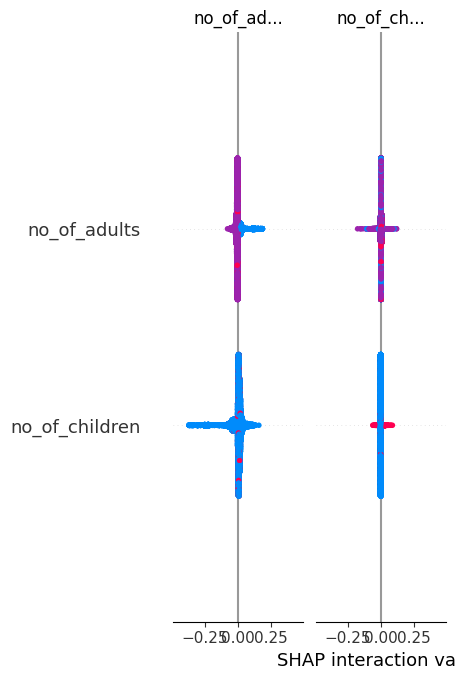

In [14]:
import shap

explainer = shap.Explainer(rf)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)

tampoco funciona el shap

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ca563382-6f70-4aa4-99f1-efca4704b6b0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>